In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
# Adaboost Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100,   # Using Moon dataset with noise
                             learning_rate=0.1,algorithm ="SAMME",
                             random_state =42)

ada_clf.fit (X_train,y_train)                                             # Fitting the model
y_predict = ada_clf.predict(X_test)
accuracy_score(y_predict,y_test)                                          # Accuracy for test data

0.856

In [56]:
# Gradient boosting with Decision tree 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 2*X[:, 0]**2 + 0.07 * np.random.randn(100)

tree1 = DecisionTreeRegressor(max_depth=2,random_state=42)
tree1.fit (x,y)
y2 = y - tree1.predict(x)

tree2 = DecisionTreeRegressor(max_depth=2,random_state=42)
tree2.fit (x,y2)
y3 = y2 - tree2.predict(x)

tree3 = DecisionTreeRegressor(max_depth=2,random_state=42)
tree3.fit (x,y3)

X_new = np.array([[0.8]])

y_predict = sum(model.predict(X_new) for model in (tree1,tree2,tree3))
y_predict

array([0.52884538])

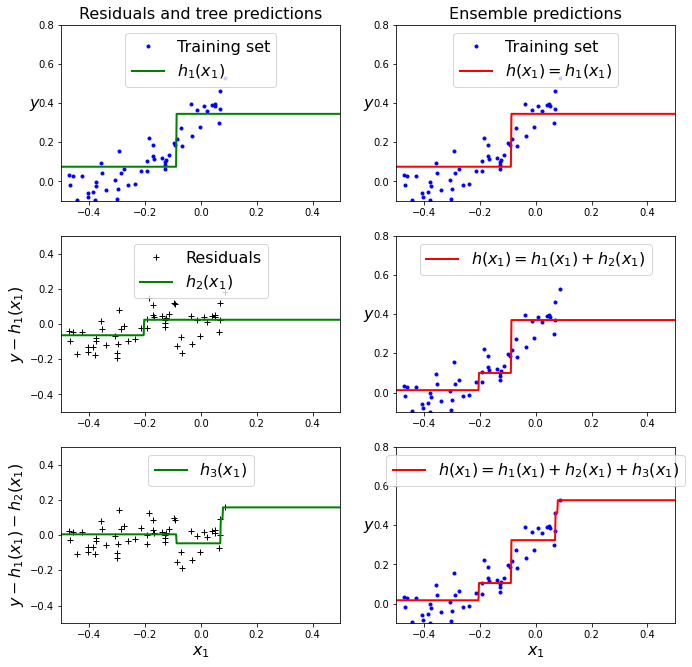

In [57]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)


plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree1], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree1], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree2], x, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree1, tree2], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree3], x, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree1, tree2, tree3], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.show()

In [31]:
?DecisionTreeRegressor